In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib as mpl
import torch
import torch.nn.functional as F
from torch.autograd import Variable

In [22]:
random_imgs = np.load('./random/random_imgs.npy')
random_labs = np.load('./random/random_labs.npy')
random_imgs = random_imgs.astype(np.float32)
random_labs = random_labs.astype(np.float32)

random_imgs = random_imgs.reshape(-1,16)
random_labs = random_labs.reshape(-1,1)
print(random_imgs.shape)
print(random_labs.shape)
x_torch = Variable(torch.from_numpy(random_imgs))
y_torch = Variable(torch.from_numpy(random_labs))
print(x_torch.shape[0])

(64, 16)
(64, 1)
64


In [23]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.l1 = torch.nn.Linear(4*4,4)
        self.l2 = torch.nn.Linear(4,1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self,x):
        fc_1 = self.l1(x)
        fc_1_ac = self.sigmoid(fc_1)
        fc_2 = self.l2(fc_1_ac)
        y_pred = self.sigmoid(fc_2)
        return y_pred
    
model = Model()

for m in model.modules():
    if isinstance(m,torch.nn.Linear):
        torch.nn.init.normal(m.weight,mean=0,std=0.1)
        torch.nn.init.constant(m.bias,0.1)
        
criterion = torch.nn.MSELoss(size_average = True)
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)    

loss_array = []
accuracy_array = []
for epoch in range(11000):
    outputs = model(x_torch)
    loss = criterion(outputs, y_torch)

    y_pred = outputs.clone()
    y_pred[y_pred>=0.5] = 1
    y_pred[y_pred<0.5] = 0
    acc = torch.sum(torch.isclose(y_pred,y_torch)).item()/y_torch.shape[0]
    if epoch % 100 == 0:
        print(epoch,loss.item())
        print(epoch,acc)
    
    loss_array.append(loss)
    accuracy_array.append(acc)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/Users/cacikkong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
/Users/cacikkong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
/Users/cacikkong/anaconda3/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


0 0.23715929687023163
0 0.828125
100 0.14471317827701569
100 0.828125
200 0.14204883575439453
200 0.828125
300 0.14101634919643402
300 0.828125
400 0.1400291621685028
400 0.828125
500 0.13896478712558746
500 0.828125
600 0.1378116011619568
600 0.828125
700 0.13657352328300476
700 0.828125
800 0.13525941967964172
800 0.828125
900 0.13388074934482574
900 0.828125
1000 0.13244953751564026
1000 0.828125
1100 0.13097679615020752
1100 0.828125
1200 0.12947119772434235
1200 0.828125
1300 0.12793849408626556
1300 0.828125
1400 0.1263815313577652
1400 0.828125
1500 0.12480086833238602
1500 0.828125
1600 0.12319549173116684
1600 0.828125
1700 0.12156375497579575
1700 0.828125
1800 0.119904063642025
1800 0.828125
1900 0.11821547895669937
1900 0.828125
2000 0.11649802327156067
2000 0.828125
2100 0.11475284397602081
2100 0.828125
2200 0.11298216134309769
2200 0.828125
2300 0.11118912696838379
2300 0.828125
2400 0.10937754064798355
2400 0.828125
2500 0.10755161195993423
2500 0.828125
2600 0.10571560

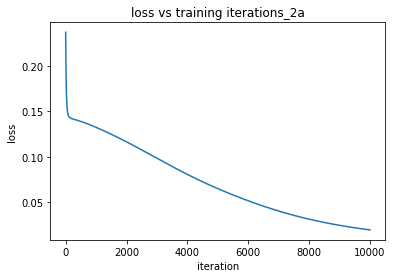

In [24]:
x = np.arange(0,10000,1)
y = loss_array[:10000]
fig = plt.figure()
plt.plot(x,y)
plt.title('loss vs training iterations_2a')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.savefig('2a_loss')

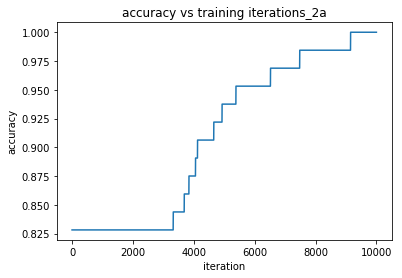

In [25]:
x = np.arange(0,10000,1)
y = accuracy_array[:10000]
fig = plt.figure()
plt.plot(x,y)
plt.title('accuracy vs training iterations_2a')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.savefig('2a_accuracy')